In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
lt = ['PmSetupId',
 'ProductionOrder',
 'BinCode',
 'PmTrayId',
 'VoltageIn',
 'VoltageBoot',
 'DeviceId',
 'PhotoTicksDiff',
 'ZeroInterceptPM2p5NumbConcRef_1',
 'ZeroInterceptPM2p5MeanPartMassRef_1',
 'FanSpeedStd_2',
 'PmNormRate_2',
 'TotalCounts_2',
 'WarningCode',
 'ErrorCode',
 'KclHyp_0',
  'KclHyp_1', 
 'ArzHyp_0',
 'ArzHyp_1',
 'Omega',
 'GainKclMc_2p5',
 'GainKclNc_2p5',
 'GainArzMc_2p5',
 'GainArzNc_2p5',
 'FacilityNr',
 'TrayId',
 # 'day',
 # 'week',
 # 'month'
     ]

In [3]:
# ph = r".\testfile\pdtestdata.csv"
ph = r".\testfile\mc03test.csv"
df = pd.read_csv(ph,index_col=0,parse_dates=["StartDateTime"])
df.sort_index(ascending=True,inplace=True)
df['day'] = df.index.date
df = df[lt]
df = df.head(50)
df.shape

NameError: name 'lt' is not defined

# 属性&方法:

## all:

In [5]:
df.groupby(["FacilityNr"]).all()   #该组所有的值都为True: True

,PmSetupId,ProductionOrder,BinCode,PmTrayId,VoltageIn,VoltageBoot,DeviceId,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,FanSpeedStd_2,PmNormRate_2,TotalCounts_2,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,ArzHyp_0,ArzHyp_1,Omega,GainKclMc_2p5,GainKclNc_2p5,GainArzMc_2p5,GainArzNc_2p5,TrayId
FacilityNr,,,,,,,,,,,,,,,,,,,,,,,,,
CN-100340,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True
CN-100341,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True
CN-100342,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True


## agg:聚合函数

In [ ]:
df.groupby("FacilityNr").agg({"Omega":["mean",max],"KclHyp_0":["std"],"KclHyp_0":["min"],"ArzHyp_0":["median"]})

## any:

In [ ]:
dt.groupby("FacilityNr").any()  #是否有True

## bfill:

In [ ]:
dt.groupby("FacilityNr").bfill().head()   #向后填充空值

## boxplot

In [5]:
dbp = df[["KclHyp_0","KclHyp_1","ArzHyp_0","ArzHyp_1","FacilityNr"]]

CN-100340         AxesSubplot(0.1,0.559091;0.363636x0.340909)
CN-100341    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
CN-100342             AxesSubplot(0.1,0.15;0.363636x0.340909)
dtype: object

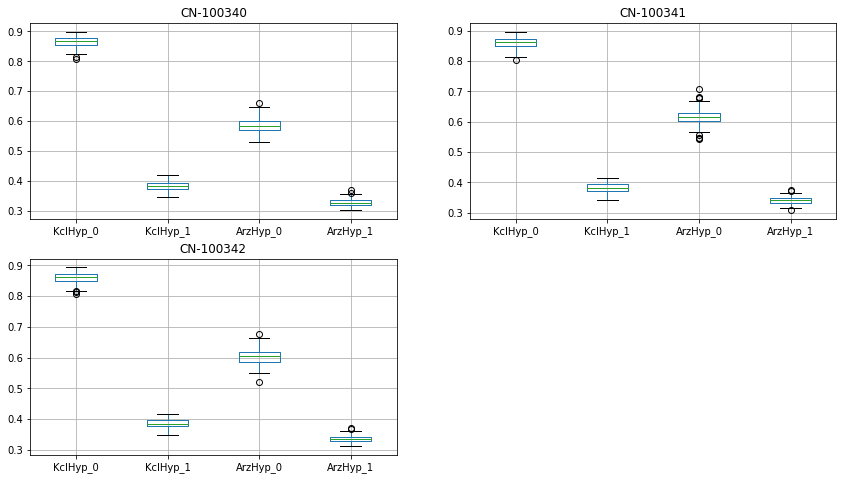

In [6]:
dbp.groupby("FacilityNr").boxplot(figsize=(14,8),sharey=False)

In [ ]:
df.groupby("FacilityNr")[["KclHyp_0","ArzHyp_0"]].boxplot()

In [ ]:
df.groupby("FacilityNr")["KclHyp_0"].hist(alpha=0.3,legend=True)

In [ ]:
df.head(1)

In [ ]:
sns.boxplot(data=dbp,
           x="FacilityNr",
           y="KclHyp_0",
           )

## corr:相关性

In [ ]:
dt.groupby("FacilityNr").corr()   #相关性

## count:计数

In [ ]:
dt.groupby("FacilityNr").count()   #每组中每列的个数

## cov:协方差

In [ ]:
dt.groupby("FacilityNr").cov()  #协方差

## cumcount:累计次数

In [ ]:
df = pd.DataFrame([['a'], ['a'], ['a'], ['b'], ['b'], ['a']],columns=['A'])
df
df.groupby('A').cumcount()  #累计次数

## cummax:累计最大值

In [ ]:
dt.dropna(how='any',axis=0).groupby("FacilityNr")['Omega'].cummax(axis=0)   #???

## describe:

In [ ]:
dt.groupby("FacilityNr")[['Omega','VoltageIn']].describe()   #默认是所有列, 或指定列['Omega','VoltageIn']

In [ ]:
dt.groupby("FacilityNr")[["Omega","KclHyp_0"]].describe().stack()

In [ ]:
dt.groupby("FacilityNr").apply(lambda x: x.describe())[["Omega","KclHyp_0"]]    #将每一组传给lambda

## filter:  过滤:Filter的目的是要返回哪一个DataFrame

In [ ]:
# DataFrameGroupBy.filter(func,dropna):
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar'],
                    'B' : [1, 2, 3, 4, 5, 6],
                    'C' : [2.0, 5., 8., 1., 2., 9.]})
df
df.groupby('A').filter(lambda x: x['B'].mean()>3)   #groupby分组后,按照条件返回组

In [ ]:
dt.groupby("FacilityNr")["Omega"].mean()

In [ ]:
df.groupby("FacilityNr").filter(lambda x: len(x)<150).head(1)   #取行数<150的哪些组

In [ ]:
df.groupby("FacilityNr").filter(lambda x: x.Omega.mean()<0.86).head(1)   #取Omega均值<0.86的那些组

In [ ]:
# df.head(1)

In [ ]:
df.filter(regex="\w+[0-3]").head()    #对所有列使用正则

In [ ]:
df.filter(regex="Gain.*Nc").head()    #对所有列使用正则

## hist:

FacilityNr
CN-100340    AxesSubplot(0.125,0.125;0.775x0.755)
CN-100341    AxesSubplot(0.125,0.125;0.775x0.755)
CN-100342    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Omega, dtype: object

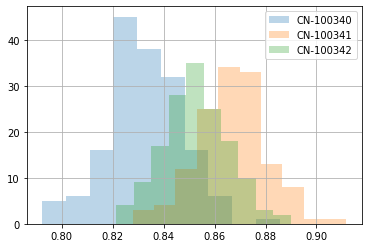

In [10]:
# dt.groupby("FacilityNr")[['Omega','VoltageIn']].hist()
df.groupby("FacilityNr")['Omega'].hist(alpha=0.3,legend=True)

array([<AxesSubplot:title={'center':'CN-100340'}>,
       <AxesSubplot:title={'center':'CN-100341'}>,
       <AxesSubplot:title={'center':'CN-100342'}>], dtype=object)

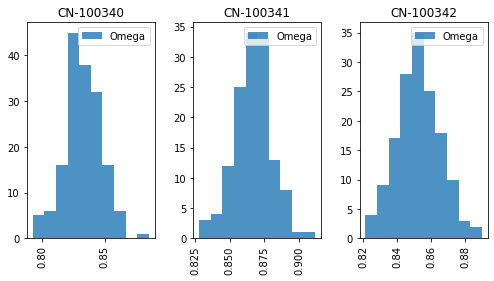

In [12]:
df.hist(column=['Omega'],
        by=['FacilityNr'],
        alpha=0.8,
        legend=True,
        layout=(1,3),
        figsize=(8,4)
       )

In [ ]:
sns.histplot(data=dt,
            x='Omega',
            hue='FacilityNr',
            )

## idxmax:最大值索引

In [ ]:
dt.groupby("FacilityNr").idxmax(skipna=True)

## idxmin:最小值索引

## mad:返回所请求轴的值的平均绝对偏差

## nunique:唯一值的个数

In [ ]:
df = pd.DataFrame({'id': ['spam', 'egg', 'egg', 'spam','ham', 'ham'],
                    'value1': [1, 5, 5, 2, 5, 5],
                    'value2': list('abbaxy')})
df

In [ ]:
df.groupby('id').nunique()

## nth: 选取第几行

In [8]:
g = df.groupby('FacilityNr')
g.nth(3)

,PmSetupId,ProductionOrder,BinCode,PmTrayId,VoltageIn,VoltageBoot,DeviceId,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,FanSpeedStd_2,PmNormRate_2,TotalCounts_2,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,ArzHyp_0,ArzHyp_1,Omega,GainKclMc_2p5,GainKclNc_2p5,GainArzMc_2p5,GainArzNc_2p5,TrayId
FacilityNr,,,,,,,,,,,,,,,,,,,,,,,,,
CN-100340,CN-100340,1992659,01,71,0.524144,0.793766,F31E5A9CEDDE3E70,12.0,2461.216064,0.354921,4.525336,0.174852,326.0,0.0,0.0,0.880300,0.373288,0.600683,0.333102,0.828972,0.812255,6.084305,1.338768,5.245752,2076.0
CN-100341,CN-100341,1992659,01,69,0.524201,0.790520,B94AB5601D8B9DF6,13.0,2257.434326,0.328190,4.104953,0.203196,346.0,0.0,0.0,0.851558,0.398545,0.584185,0.336802,0.846565,0.747205,5.597043,1.261185,5.196907,2.0
CN-100342,CN-100342,1992660,01,68,0.522252,0.789855,F029957768CA3C3E,12.0,1985.023071,0.350616,3.929681,0.255887,372.0,0.0,0.0,0.853453,0.380042,0.605241,0.323672,0.856623,0.719355,5.388424,1.241316,5.343821,3.0


## pad:用前面一个值填充,将被ffill取代

## pct_change:表示当前元素与先前元素的相差百分比

In [ ]:
d = dt[['Omega','VoltageIn','FacilityNr']].head(5)
d

In [ ]:
d.groupby('FacilityNr').pct_change()  #???

In [ ]:
d[['Omega','VoltageIn']].pct_change()


## plot:同pd.plot

In [10]:
d = df[['Omega','VoltageIn','FacilityNr']].head(50)
d.head(2)

,Omega,VoltageIn,FacilityNr
StartDateTime,,,
2021-11-10 00:09:48,0.849134,0.521151,CN-100342
2021-11-10 00:11:15,0.820711,0.524995,CN-100340


In [ ]:
d.groupby('FacilityNr').plot(column=['Omega'],kind='bar',legend=True)

In [ ]:
dt.groupby("FacilityNr")[["Omega","KclHyp_0"]].plot.density()

In [ ]:
dt.groupby("FacilityNr")["Omega"].plot.density()

## quantile:分位数

In [12]:
# d.groupby('FacilityNr').quantile(q=0.5)
d.groupby('FacilityNr').quantile(q=[0.5,0.75])

Omega  VoltageIn
FacilityNr                          
CN-100340  0.50  0.824596   0.524144
           0.75  0.832291   0.524995
CN-100341  0.50  0.858733   0.522678
           0.75  0.869077   0.524444
CN-100342  0.50  0.850146   0.523376
           0.75  0.855822   0.524051

## rank:Provide the rank of values within each group.

In [13]:
d = df[['Omega','VoltageIn','FacilityNr']].head(10)
d

,Omega,VoltageIn,FacilityNr
StartDateTime,,,
2021-11-10 00:09:48,0.849134,0.521151,CN-100342
2021-11-10 00:11:15,0.820711,0.524995,CN-100340
2021-11-10 00:23:24,0.875859,0.526363,CN-100341
2021-11-10 00:24:39,NaN,0.524518,CN-100342
2021-11-10 00:28:03,0.815063,0.521947,CN-100340
2021-11-10 00:42:34,NaN,0.521852,CN-100342
2021-11-10 00:44:18,0.869077,0.524688,CN-100341
2021-11-10 00:46:41,0.817069,0.523000,CN-100340
2021-11-10 00:57:17,0.856623,0.522252,CN-100342


In [14]:
d.groupby('FacilityNr').rank()

,Omega,VoltageIn
StartDateTime,,
2021-11-10 00:09:48,1.0,1.0
2021-11-10 00:11:15,3.0,3.0
2021-11-10 00:23:24,3.0,3.0
2021-11-10 00:24:39,NaN,4.0
2021-11-10 00:28:03,1.0,1.0
2021-11-10 00:42:34,NaN,2.0
2021-11-10 00:44:18,2.0,2.0
2021-11-10 00:46:41,2.0,2.0
2021-11-10 00:57:17,2.0,3.0


In [15]:
d.rank()

,Omega,VoltageIn,FacilityNr
StartDateTime,,,
2021-11-10 00:09:48,5.0,1.0,8.5
2021-11-10 00:11:15,3.0,9.0,2.0
2021-11-10 00:23:24,8.0,10.0,5.0
2021-11-10 00:24:39,NaN,7.0,8.5
2021-11-10 00:28:03,1.0,3.0,2.0
2021-11-10 00:42:34,NaN,2.0,8.5
2021-11-10 00:44:18,7.0,8.0,5.0
2021-11-10 00:46:41,2.0,6.0,2.0
2021-11-10 00:57:17,6.0,4.0,8.5


## resample:

## sample:每组中随机抽取值

In [ ]:
d.groupby('FacilityNr').sample(n=2,replace=False)

## shift:Shift each group by periods observations

In [ ]:
d = dt[['Omega','VoltageIn','FacilityNr']].head(10)
d

In [ ]:
d.groupby('FacilityNr').shift()

## size:组大小

In [ ]:
d.groupby('FacilityNr').size()

## skew: 偏度

## tshift:Shift the time index, using the index’s frequency if available

# groupby分组方法

In [ ]:
df.groupby("key1"):          一列聚合；
df.groupby(["key1","key2"]):    多列聚合；
df["key2"].groupby(df["key1"]).mean():     按某一列进行一重聚合求均值；
df["key1"].groupby([df["key1"],df["key2"]].count():    按某一列进行多重聚合计数
df["data1"].groupby([]).mean():     分组件与原df无关，而是另外的任何长度适当数组
https://blog.csdn.net/FGH333xwy/article/details/110672407

NameError: name 'dt' is not defined

## 一列聚合/多列聚合；
    df.groupby("key1")/df.groupby(["key1","key2"]): 

In [6]:
# groups:查看分组:
print("查看单列分组:",df.groupby("FacilityNr"))
print("查看多列分组:",df.groupby(["FacilityNr","ProductionOrder"]))

查看单列分组: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002033F1BE1C0>
查看多列分组: <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002033F1BE190>


In [25]:
# 按列进行分组,感觉有点像迭代:
# 用字典:
dtxt = df.head(10)
adict = {"BinCode":"Bin","FacilityNr":"facility"}
for name,gp in dtxt.groupby(adict,axis=1):
    print(name)
    print("*"*50)
    print(gp)

Bin
**************************************************
                    BinCode
StartDateTime              
2021-11-10 00:09:48      01
2021-11-10 00:11:15      01
2021-11-10 00:23:24      01
2021-11-10 00:24:39      F2
2021-11-10 00:28:03      01
2021-11-10 00:42:34      F2
2021-11-10 00:44:18      01
2021-11-10 00:46:41      01
2021-11-10 00:57:17      01
2021-11-10 00:57:32      01
facility
**************************************************
                    FacilityNr
StartDateTime                 
2021-11-10 00:09:48  CN-100342
2021-11-10 00:11:15  CN-100340
2021-11-10 00:23:24  CN-100341
2021-11-10 00:24:39  CN-100342
2021-11-10 00:28:03  CN-100340
2021-11-10 00:42:34  CN-100342
2021-11-10 00:44:18  CN-100341
2021-11-10 00:46:41  CN-100340
2021-11-10 00:57:17  CN-100342
2021-11-10 00:57:32  CN-100341


In [24]:
# 用series:
dtxt = df.head(10)
aseries = pd.Series(adict)
for name,gp in dtxt.groupby(aseries,axis=1):
    print(name)
    print("*"*50)
    print(gp)

Bin
**************************************************
                    BinCode
StartDateTime              
2021-11-10 00:09:48      01
2021-11-10 00:11:15      01
2021-11-10 00:23:24      01
2021-11-10 00:24:39      F2
2021-11-10 00:28:03      01
2021-11-10 00:42:34      F2
2021-11-10 00:44:18      01
2021-11-10 00:46:41      01
2021-11-10 00:57:17      01
2021-11-10 00:57:32      01
facility
**************************************************
                    FacilityNr
StartDateTime                 
2021-11-10 00:09:48  CN-100342
2021-11-10 00:11:15  CN-100340
2021-11-10 00:23:24  CN-100341
2021-11-10 00:24:39  CN-100342
2021-11-10 00:28:03  CN-100340
2021-11-10 00:42:34  CN-100342
2021-11-10 00:44:18  CN-100341
2021-11-10 00:46:41  CN-100340
2021-11-10 00:57:17  CN-100342
2021-11-10 00:57:32  CN-100341


## 聚合后,直接进行函数应用
    df["key1"].groupby([df["key1"],def["key2"]].count()

In [ ]:
df["Omega"].groupby(df["FacilityNr"]).mean()
# df.groupby('FacilityNr')['Omega'].mean()

In [ ]:
data["Omega"].groupby(data["FacilityNr"]).agg(['max','min',np.mean])

## Cut: 用cut,按照值的范围进行分组

In [4]:
dfcut = df[df["Omega"].notna()]

In [5]:
bins = [0,0.8,0.83,0.85,0.88,0.95]
cuts = pd.cut(df["Omega"],bins,)

In [6]:
df.groupby(cuts).size()

Omega
(0.0, 0.8]        4
(0.8, 0.83]      79
(0.83, 0.85]    137
(0.85, 0.88]    208
(0.88, 0.95]     22
dtype: int64

In [7]:
df.index

DatetimeIndex(['2021-11-10 00:09:48', '2021-11-10 00:11:15',
               '2021-11-10 00:23:24', '2021-11-10 00:24:39',
               '2021-11-10 00:28:03', '2021-11-10 00:42:34',
               '2021-11-10 00:44:18', '2021-11-10 00:46:41',
               '2021-11-10 00:57:17', '2021-11-10 00:57:32',
               ...
               '2021-11-12 23:04:39', '2021-11-12 23:16:46',
               '2021-11-12 23:16:55', '2021-11-12 23:23:32',
               '2021-11-12 23:24:51', '2021-11-12 23:30:53',
               '2021-11-12 23:41:32', '2021-11-12 23:42:30',
               '2021-11-12 23:46:11', '2021-11-12 23:57:44'],
              dtype='datetime64[ns]', name='StartDateTime', length=511, freq=None)

In [8]:
dtbins = pd.to_datetime(["2021-11-10 00:09:48","2021-11-10 00:28:03","2021-11-12 22:58:44"])
cuts = pd.cut(df.index,dtbins)

In [58]:
cuts

[NaN, (2021-11-10 00:09:48, 2021-11-10 00:28:03], (2021-11-10 00:09:48, 2021-11-10 00:28:03], (2021-11-10 00:09:48, 2021-11-10 00:28:03], (2021-11-10 00:09:48, 2021-11-10 00:28:03], ..., (2021-11-10 00:28:03, 2021-11-12 22:58:44], (2021-11-10 00:28:03, 2021-11-12 22:58:44], (2021-11-10 00:28:03, 2021-11-12 22:58:44], (2021-11-10 00:28:03, 2021-11-12 22:58:44], (2021-11-10 00:28:03, 2021-11-12 22:58:44]]
Length: 50
Categories (2, interval[datetime64[ns], right]): [(2021-11-10 00:09:48, 2021-11-10 00:28:03] < (2021-11-10 00:28:03, 2021-11-12 22:58:44]]

(2021-11-10 00:09:48, 2021-11-10 00:28:03]    AxesSubplot(0.125,0.2;0.775x0.68)
(2021-11-10 00:28:03, 2021-11-12 22:58:44]    AxesSubplot(0.125,0.2;0.775x0.68)
Name: Omega, dtype: object

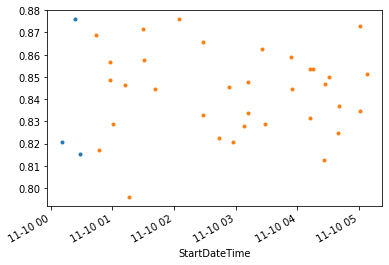

In [62]:
# for sp,dd in df.groupby(cuts)[["Omega","KclHyp_0"]]:
#     print(dd)
df.groupby(cuts)["Omega"].plot(style=".")

## Note:
    这个方法和 df.groupby("key1")["key2"].mean() 功能相同

In [ ]:
df.groupby("FacilityNr")["KclHyp_0"].mean()

# groups:获得所有组的两端索引的列表
    以标签索引列表表示

In [7]:
df.groupby("FacilityNr").groups

{'CN-100340': [2021-11-10 00:11:15, 2021-11-10 00:28:03, 2021-11-10 00:46:41, 2021-11-10 01:00:20, 2021-11-10 01:15:45, 2021-11-10 01:41:07, 2021-11-10 02:27:41, 2021-11-10 02:43:58, 2021-11-10 02:57:20, 2021-11-10 03:12:13, 2021-11-10 03:28:00, 2021-11-10 03:43:57, 2021-11-10 04:12:38, 2021-11-10 04:26:14, 2021-11-10 04:40:00, 2021-11-10 05:00:47, 2021-11-10 06:07:56, 2021-11-10 06:32:55, 2021-11-10 06:48:55, 2021-11-10 07:07:32, 2021-11-10 07:25:31, 2021-11-10 07:53:21, 2021-11-10 08:48:34, 2021-11-10 09:08:19, 2021-11-10 09:29:59, 2021-11-10 09:59:14, 2021-11-10 10:12:17, 2021-11-10 10:28:35, 2021-11-10 10:46:48, 2021-11-10 11:05:49, 2021-11-10 11:26:11, 2021-11-10 11:48:43, 2021-11-10 12:03:31, 2021-11-10 12:16:43, 2021-11-10 12:34:04, 2021-11-10 13:17:26, 2021-11-10 13:31:17, 2021-11-10 14:04:09, 2021-11-10 14:22:51, 2021-11-10 14:52:06, 2021-11-10 15:10:00, 2021-11-10 15:23:39, 2021-11-10 15:46:00, 2021-11-10 16:03:02, 2021-11-10 16:21:03, 2021-11-10 16:34:42, 2021-11-10 16:58:58

# indices:获得所有组的两端索引的列表
    以位置索引列表表示

In [ ]:
df.groupby("FacilityNr").indices

# get_group:选择分组 

In [ ]:
# get_group:选择分组；
df.groupby("FacilityNr").get_group("CN-100340")
# data.groupby("FacilityNr").get_group(("CN-100340","CN-100341"))

# head: 分组前,每组前几行

In [7]:
df.groupby("FacilityNr").head(1)

,PmSetupId,ProductionOrder,BinCode,PmTrayId,VoltageIn,VoltageBoot,DeviceId,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,FanSpeedStd_2,PmNormRate_2,TotalCounts_2,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,ArzHyp_0,ArzHyp_1,Omega,GainKclMc_2p5,GainKclNc_2p5,GainArzMc_2p5,GainArzNc_2p5,FacilityNr,TrayId
StartDateTime,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-10 00:09:48,CN-100342,1992660,01,67,0.521151,0.789385,2AB80839D91D9C90,17.0,2069.508545,0.354474,3.979321,0.248568,366.0,0.0,0.0,0.864157,0.381000,0.603607,0.335196,0.849134,0.736848,5.519464,1.146975,4.937685,CN-100342,2033.0
2021-11-10 00:11:15,CN-100340,1992659,01,70,0.524995,0.822433,0C307C48E6014CDB,18.0,2337.787109,0.342890,3.133811,0.232349,431.0,0.0,0.0,0.837868,0.406350,0.545531,0.318016,0.820711,0.616036,4.614503,1.197281,4.691354,CN-100340,2075.0
2021-11-10 00:23:24,CN-100341,1992659,01,72,0.526363,0.793489,96A5E82A1B697833,13.0,2317.132568,0.323289,3.574547,0.219944,371.0,0.0,0.0,0.845295,0.391991,0.608584,0.337547,0.875859,0.692245,5.185360,1.222337,5.036826,CN-100341,2078.0


# first: 分组后,每组第一个

In [20]:
df.groupby("FacilityNr").first()

,PmSetupId,ProductionOrder,BinCode,PmTrayId,VoltageIn,VoltageBoot,DeviceId,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,FanSpeedStd_2,PmNormRate_2,TotalCounts_2,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,ArzHyp_0,ArzHyp_1,Omega,GainKclMc_2p5,GainKclNc_2p5,GainArzMc_2p5,GainArzNc_2p5,TrayId
FacilityNr,,,,,,,,,,,,,,,,,,,,,,,,,
CN-100340,CN-100340,1992659,01,70,0.524995,0.822433,0C307C48E6014CDB,18.0,2337.787109,0.342890,3.133811,0.232349,431.0,0.0,0.0,0.837868,0.406350,0.545531,0.318016,0.820711,0.616036,4.614503,1.197281,4.691354,2075.0
CN-100341,CN-100341,1992659,01,72,0.526363,0.793489,96A5E82A1B697833,13.0,2317.132568,0.323289,3.574547,0.219944,371.0,0.0,0.0,0.845295,0.391991,0.608584,0.337547,0.875859,0.692245,5.185360,1.222337,5.036826,2078.0
CN-100342,CN-100342,1992660,01,67,0.521151,0.789385,2AB80839D91D9C90,17.0,2069.508545,0.354474,3.979321,0.248568,366.0,0.0,0.0,0.864157,0.381000,0.603607,0.335196,0.849134,0.736848,5.519464,1.146975,4.937685,2033.0


# Reshaping:

In [9]:
df.groupby(["FacilityNr","BinCode"]).size().unstack()

BinCode,01,31,5F,6F,70,71,75,7A,7F,E0,E2,E3,E4,F2,FA
FacilityNr,,,,,,,,,,,,,,,
CN-100340,162.0,1.0,NaN,2.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
CN-100341,127.0,2.0,1.0,NaN,1.0,2.0,7.0,NaN,3.0,1.0,NaN,4.0,1.0,NaN,NaN
CN-100342,147.0,4.0,NaN,4.0,2.0,5.0,5.0,1.0,2.0,1.0,1.0,1.0,NaN,13.0,1.0


# agg,xxx: 聚合

## 聚合：
    np.sum() //求和；
    np.prod() //所有元素相乘；
    np.mean() //平均值；
    np.std() //标准差；
    np.var() //方差；
    np.median() //中数；
    np.power() //幂运算；
    np.sqrt() //开方；
    np.min() //最小值；
    np.max() //最大值；
    np.argmin() //最小值的下标；
    np.argmax() //最大值的下标；
    np.inf //无穷大；
    np.exp(10) //以e为底的指数；
    np.log(10) //对数

In [ ]:
# agg,xxx: 聚合:
df.groupby("FacilityNr").mean()    #注意mean和mean()的区别

In [27]:
# agg:一次应用多个聚合函数：传入列表:列表中的函数将会被应用于各个组的所有列
df.groupby("FacilityNr").agg([np.sum,np.mean,np.std])

<ipython-input-27-e567dcfb4602>:2: FutureWarning: ['PmSetupId', 'BinCode', 'DeviceId'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby("FacilityNr").agg([np.sum,np.mean,np.std])


ProductionOrder                             PmTrayId             \
                       sum          mean           std      sum       mean   
FacilityNr                                                                   
CN-100340        439353940  2.510594e+06  6.803084e+06    12109  69.194286   
CN-100341        297462271  1.996391e+06  2.732245e+03    10368  69.583893   
CN-100342        373329651  1.996415e+06  2.555961e+03    13053  69.802139   

                      VoltageIn                     VoltageBoot            \
                 std        sum      mean       std         sum      mean   
FacilityNr                                                                  
CN-100340   1.596322  88.916126  0.519977  0.003664  135.371096  0.791644   
CN-100341   1.390609  76.276538  0.518888  0.003875  116.975530  0.795752   
CN-100342   2.068295  94.640777  0.520004  0.003393  147.103264  0.808260   

                     PhotoTicksDiff                       \
                 std            sum       mean       std   
FacilityNr                                                 
CN-100340   0.019122         2530.0  14.882353  4.284033   
CN-100341   0.087460         2030.0  14.295775  2.523053   
CN-100342   0.154765         2530.0  14.540230  5.388501   

           ZeroInterceptPM2p5NumbConcRef_1                           \
                                       sum         mean         std   
FacilityNr                                                            
CN-100340                    442144.204346  2526.538311  169.519554   
CN-100341                    317967.265381  2192.877692  132.458089   
CN-100342                    386913.025635  2091.421760  207.807722   

           ZeroInterceptPM2p5MeanPartMassRef_1                      \
                                           sum      mean       std   
FacilityNr                                                           
CN-100340                            63.758290  0.364333  0.010229   
CN-100341                            45.359998  0.312828  0.006911   
CN-100342                            64.045706  0.346193  0.016380   

           FanSpeedStd_2                     PmNormRate_2                      \
                     sum      mean       std          sum      mean       std   
FacilityNr                                                                      
CN-100340    1015.727961  6.082203  5.668445    30.892596  0.184986  0.029084   
CN-100341     738.311806  5.509790  4.074658    27.153888  0.202641  0.033730   
CN-100342     874.306574  5.790110  4.416941    36.588736  0.242310  0.037964   

           TotalCounts_2                        WarningCode             \
                     sum        mean        std         sum       mean   
FacilityNr                                                               
CN-100340        59015.0  353.383234  55.374055         0.0   0.000000   
CN-100341        49497.0  369.380597  65.382253     10000.0  74.626866   
CN-100342        56199.0  372.178808  60.446901     10000.0  66.225166   

                       ErrorCode              KclHyp_0                     \
                   std       sum mean  std         sum     mean       std   
FacilityNr                                                                  
CN-100340     0.000000       0.0  0.0  0.0  142.715149  0.86494  0.017179   
CN-100341   863.868426       0.0  0.0  0.0  115.361946  0.86091  0.018473   
CN-100342   813.788459       0.0  0.0  0.0  129.831258  0.85981  0.017891   

             KclHyp_1                       ArzHyp_0                      \
                  sum      mean       std        sum      mean       std   
FacilityNr                                                                 
CN-100340   63.110078  0.382485  0.014340  96.626366  0.585614  0.023801   
CN-100341   51.185732  0.381983  0.015605  82.446158  0.615270  0.027358   
CN-100342   58.249518  0.385758  0.013985  91.146776  0.603621  0.024007   

             ArzHy

In [ ]:
# 有的函数可以直接用,有的要用np:
df.groupby("FacilityNr").agg([sum,"mean","std"])

In [22]:
# 利用元组进行重命名:
df.groupby("FacilityNr")[["Omega","VoltageIn"]].agg([("求和",np.sum),("平均值",np.mean)])

Omega            VoltageIn          
                    求和       平均值         求和       平均值
FacilityNr                                           
CN-100340   137.354451  0.832451  88.916126  0.519977
CN-100341   116.126422  0.866615  76.276538  0.518888
CN-100342   128.774254  0.852810  94.640777  0.520004

In [33]:
# 对不同的列用不同的函数,传入字典:
df.groupby("FacilityNr").agg({"Omega":np.mean,"KclHyp_0":np.sum})

,Omega,KclHyp_0
FacilityNr,,
CN-100340,0.832451,142.715149
CN-100341,0.866615,115.361946
CN-100342,0.852810,129.831258


In [28]:
# 对多个列进行函数应用:
df.groupby("FacilityNr").Omega.agg(min_Omega='min',
                                      max_Omega='max')

,min_Omega,max_Omega
FacilityNr,,
CN-100340,0.792304,0.885550
CN-100341,0.827881,0.911739
CN-100342,0.821446,0.889922


In [ ]:
# 使用匿名函数:
df.groupby("FacilityNr")[["Omega"]].agg(lambda x: x.max())   #把每组 Omega值传给lambda

In [39]:
# dtxt.groupby("FacilityNr").size()

In [42]:
df.head(2)

,PmSetupId,ProductionOrder,BinCode,PmTrayId,VoltageIn,VoltageBoot,DeviceId,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,FanSpeedStd_2,PmNormRate_2,TotalCounts_2,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,ArzHyp_0,ArzHyp_1,Omega,GainKclMc_2p5,GainKclNc_2p5,GainArzMc_2p5,GainArzNc_2p5,FacilityNr,TrayId
StartDateTime,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-10 00:09:48,CN-100342,1992660,01,67,0.521151,0.789385,2AB80839D91D9C90,17.0,2069.508545,0.354474,3.979321,0.248568,366.0,0.0,0.0,0.864157,0.38100,0.603607,0.335196,0.849134,0.736848,5.519464,1.146975,4.937685,CN-100342,2033.0
2021-11-10 00:11:15,CN-100340,1992659,01,70,0.524995,0.822433,0C307C48E6014CDB,18.0,2337.787109,0.342890,3.133811,0.232349,431.0,0.0,0.0,0.837868,0.40635,0.545531,0.318016,0.820711,0.616036,4.614503,1.197281,4.691354,CN-100340,2075.0


In [43]:
dtxt = df.head(50)[["VoltageIn","FacilityNr","ProductionOrder"]]
# dtxt.groupby("FacilityNr").agg(lambda x: print(x,"*"*50,sep='\n'))   #把每组的每一列传进来
dtxt.groupby("FacilityNr").agg(lambda x:x.mean())   #每组每列的传入

,VoltageIn,ProductionOrder
FacilityNr,,
CN-100340,0.524001,1.992660e+06
CN-100341,0.522830,1.992660e+06
CN-100342,0.522971,1.992660e+06


## 对不同的列应用不同的聚合函数： 

In [ ]:
data.groupby("FacilityNr").agg({"Omega":["mean",max],"KclHyp_0":["std"],"KclHyp_5":["min"],"ArzHyp_0":["median"]})

## NameAgg: 给多重索引改名字

In [34]:
df.groupby("FacilityNr")[["Omega","VoltageIn"]].agg([np.sum,np.mean])
print("列是多重索引,如何改名,改成单重索引?")

Omega            VoltageIn          
                   sum      mean        sum      mean
FacilityNr                                           
CN-100340   137.354451  0.832451  88.916126  0.519977
CN-100341   116.126422  0.866615  76.276538  0.518888
CN-100342   128.774254  0.852810  94.640777  0.520004

列是多重索引,如何改名,改成单重索引?


In [28]:
df.groupby("FacilityNr")[["Omega","VoltageIn"]].agg(求和_Omega=pd.NamedAgg(column='Omega',aggfunc=np.sum),
                                                   平均_Omega = pd.NamedAgg(column='Omega',aggfunc=np.mean),
                                                    求和_VoltageIn=pd.NamedAgg(column='VoltageIn',aggfunc=np.sum),
                                                   平均_VoltageIn = pd.NamedAgg(column='VoltageIn',aggfunc=np.mean),
                                                   )

,求和_Omega,平均_Omega,求和_VoltageIn,平均_VoltageIn
FacilityNr,,,,
CN-100340,137.354451,0.832451,88.916126,0.519977
CN-100341,116.126422,0.866615,76.276538,0.518888
CN-100342,128.774254,0.852810,94.640777,0.520004


## 带参数聚合

In [61]:
def f(s,low,heigh):
    return any(s.between(low,heigh))
df.groupby("FacilityNr")['Omega'].agg(f,0.85,0.852)

FacilityNr
CN-100340    True
CN-100341    True
CN-100342    True
Name: Omega, dtype: bool

In [62]:
df[df["Omega"].between(0.85,0.851)]

,PmSetupId,ProductionOrder,BinCode,PmTrayId,VoltageIn,VoltageBoot,DeviceId,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,FanSpeedStd_2,PmNormRate_2,TotalCounts_2,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,ArzHyp_0,ArzHyp_1,Omega,GainKclMc_2p5,GainKclNc_2p5,GainArzMc_2p5,GainArzNc_2p5,FacilityNr,TrayId
StartDateTime,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-11-10 04:31:14,CN-100341,1992661,01,71,0.522678,0.789376,1450543CDAA6EE81,14.0,2174.161377,0.323966,3.724988,0.220241,378.0,0.0,0.0,0.847978,0.393544,0.581941,0.317374,0.850114,0.689868,5.167549,1.375639,5.668529,CN-100341,2076.0
2021-11-10 22:09:06,CN-100342,1996495,01,72,0.521278,0.786991,6CAC12C955C2651F,14.0,1949.593018,0.333207,3.853653,0.224072,344.0,0.0,0.0,0.869772,0.380629,0.605387,0.339529,0.850598,0.814927,6.104319,1.300575,5.598929,CN-100342,2078.0
2021-11-11 02:30:09,CN-100340,1996496,01,67,0.523926,0.790469,D61372F5B870F348,13.0,2797.763428,0.350573,3.635607,0.212048,397.0,0.0,0.0,0.845581,0.397614,0.589320,0.323001,0.850459,0.674574,5.052989,1.263933,4.952522,CN-100340,2033.0
2021-11-11 15:03:56,CN-100342,1996497,01,72,0.520516,0.786228,EA8D1B6DF00DE97C,13.0,1955.937256,0.334113,3.422792,0.224029,354.0,0.0,0.0,0.867219,0.382459,0.610392,0.335722,0.850800,0.819967,6.142077,1.373699,5.913723,CN-100342,2078.0
2021-11-11 17:42:17,CN-100340,1996498,01,70,0.521931,0.786896,AFFC3472A060C59C,14.0,2411.717041,0.368078,3.602986,0.168124,325.0,0.0,0.0,0.880752,0.358640,0.618326,0.336738,0.850263,0.855636,6.409262,1.261941,4.944718,CN-100340,2075.0
2021-11-11 20:03:43,CN-100340,1999671,01,70,0.511271,0.786275,05721A2952CC4CC7,22.0,2751.530029,0.374722,4.644702,0.265472,511.0,0.0,0.0,0.806500,0.419322,0.544417,0.317779,0.850648,0.539980,4.044794,1.070113,4.193067,CN-100340,2075.0
2021-11-12 04:27:12,CN-100342,1999672,01,72,0.512518,0.789337,9497924E5BB1D18A,14.0,2078.982666,0.334896,10.624759,0.260988,408.0,0.0,0.0,0.854042,0.396209,0.601025,0.330504,0.850451,0.700976,5.250759,1.175129,5.058886,CN-100342,2078.0
2021-11-12 10:41:23,CN-100342,1999672,01,72,0.515373,0.787124,3AE8EAD6BA18404E,11.0,2061.396484,0.337389,2.866394,0.261734,408.0,0.0,0.0,0.864744,0.380713,0.602699,0.347231,0.850613,0.704654,5.278307,1.121084,4.826225,CN-100342,2078.0


# filter:过滤
    按照条件过滤掉不需要的组, 选择满足条件的组

In [42]:
dt = df[df["Omega"].notna()][["FacilityNr","Omega","VoltageBoot"]].head(100)

In [27]:
dt.groupby("FacilityNr")["Omega"].mean()

FacilityNr
CN-100340    0.817887
CN-100341    0.872468
CN-100342    0.849134
Name: Omega, dtype: float64

In [28]:
dt.groupby("FacilityNr").filter(lambda gp: gp["Omega"].mean()>0.85)   #将没一个group传递给filter的func;

,FacilityNr,Omega,VoltageBoot
StartDateTime,,,
2021-11-10 00:23:24,CN-100341,0.875859,0.793489
2021-11-10 00:44:18,CN-100341,0.869077,0.793678


# transform: 返回与原DF大小相等的DataFrame
    内容被替换成聚合的结果

In [50]:
dt = df[df["Omega"].notna()][["FacilityNr","Omega","VoltageBoot","KclHyp_0","ArzHyp_0"]].head(10)

## 传入对象:

### transform函数中传入的对象是组内的列，并且返回值需要与列长完全一致

In [51]:
# 将每组的每列依次传入:
dt.groupby("FacilityNr")[["KclHyp_0","ArzHyp_0"]].transform(lambda gp: gp-gp.min())

,KclHyp_0,ArzHyp_0
StartDateTime,,
2021-11-10 00:09:48,0.010705,0.000000
2021-11-10 00:11:15,0.000000,0.000000
2021-11-10 00:23:24,0.000000,0.024398
2021-11-10 00:28:03,0.030715,0.024352
2021-11-10 00:44:18,0.037932,0.053701
2021-11-10 00:46:41,0.010316,0.016074
2021-11-10 00:57:17,0.000000,0.001634
2021-11-10 00:57:32,0.004329,0.005655
2021-11-10 01:00:20,0.042432,0.055152


### 如果返回了标量值，那么组内的所有元素会被广播（就是大家都一样了）为这个值

In [53]:
dt.groupby("FacilityNr")[["KclHyp_0","ArzHyp_0"]].transform("mean")

,KclHyp_0,ArzHyp_0
StartDateTime,,
2021-11-10 00:09:48,0.858805,0.604424
2021-11-10 00:11:15,0.858734,0.569426
2021-11-10 00:23:24,0.857426,0.605124
2021-11-10 00:28:03,0.858734,0.569426
2021-11-10 00:44:18,0.857426,0.605124
2021-11-10 00:46:41,0.858734,0.569426
2021-11-10 00:57:17,0.858805,0.604424
2021-11-10 00:57:32,0.857426,0.605124
2021-11-10 01:00:20,0.858734,0.569426


### 利用变换方法进行组内标准化

In [55]:
dt.groupby("FacilityNr")[["KclHyp_0","ArzHyp_0"]].transform(lambda gp: (gp-gp.mean())/gp.std())

,KclHyp_0,ArzHyp_0
StartDateTime,,
2021-11-10 00:09:48,0.707107,-0.707107
2021-11-10 00:11:15,-1.085348,-1.031656
2021-11-10 00:23:24,-0.697229,0.142951
2021-11-10 00:28:03,0.512312,0.019744
2021-11-10 00:44:18,1.482917,1.353650
2021-11-10 00:46:41,-0.548758,-0.337642
2021-11-10 00:57:17,-0.707107,0.707107
2021-11-10 00:57:32,-0.448419,-0.631486
2021-11-10 01:00:20,1.121794,1.349553


### 利用变换方法进行组内缺失值的均值填充

In [59]:
dtt = df[["FacilityNr","Omega","VoltageBoot","KclHyp_0","ArzHyp_0"]].head(10)
dtt

,FacilityNr,Omega,VoltageBoot,KclHyp_0,ArzHyp_0
StartDateTime,,,,,
2021-11-10 00:09:48,CN-100342,0.849134,0.789385,0.864157,0.603607
2021-11-10 00:11:15,CN-100340,0.820711,0.822433,0.837868,0.545531
2021-11-10 00:23:24,CN-100341,0.875859,0.793489,0.845295,0.608584
2021-11-10 00:24:39,CN-100342,NaN,0.793273,NaN,NaN
2021-11-10 00:28:03,CN-100340,0.815063,0.790775,0.868583,0.569883
2021-11-10 00:42:34,CN-100342,NaN,0.789794,NaN,NaN
2021-11-10 00:44:18,CN-100341,0.869077,0.793678,0.883227,0.637886
2021-11-10 00:46:41,CN-100340,0.817069,0.794908,0.848184,0.561605
2021-11-10 00:57:17,CN-100342,0.856623,0.789855,0.853453,0.605241


In [60]:
dtt.groupby("FacilityNr").transform(lambda x: x.fillna(x.mean()))

,Omega,VoltageBoot,KclHyp_0,ArzHyp_0
StartDateTime,,,,
2021-11-10 00:09:48,0.849134,0.789385,0.864157,0.603607
2021-11-10 00:11:15,0.820711,0.822433,0.837868,0.545531
2021-11-10 00:23:24,0.875859,0.793489,0.845295,0.608584
2021-11-10 00:24:39,0.852878,0.793273,0.858805,0.604424
2021-11-10 00:28:03,0.815063,0.790775,0.868583,0.569883
2021-11-10 00:42:34,0.852878,0.789794,0.858805,0.604424
2021-11-10 00:44:18,0.869077,0.793678,0.883227,0.637886
2021-11-10 00:46:41,0.817069,0.794908,0.848184,0.561605
2021-11-10 00:57:17,0.856623,0.789855,0.853453,0.605241


# series方法应用，如: value_counts()

In [18]:
df['Note'] = df.apply(lambda x: 'AA' if x.Omega>=0.85 else('BB' if 0.80<x.Omega<0.85 else "CC"),axis=1)

In [19]:
df.groupby(["Note","FacilityNr"]).size()

Note  FacilityNr
AA    CN-100340      21
      CN-100341     120
      CN-100342      89
BB    CN-100340     140
      CN-100341      14
      CN-100342      62
CC    CN-100340      14
      CN-100341      15
      CN-100342      36
dtype: int64

In [20]:
df.groupby("Note")["FacilityNr"].value_counts().unstack()    #计数统计，pivot_table更强大

FacilityNr,CN-100340,CN-100341,CN-100342
Note,,,
AA,21,120,89
BB,140,14,62
CC,14,15,36


# pipe: 使用自定义函数

In [14]:
df.groupby("FacilityNr")['Omega'].pipe(lambda x: x.max()-x.min())

FacilityNr
CN-100340    0.093247
CN-100341    0.083858
CN-100342    0.068476
Name: Omega, dtype: float64

In [ ]:
df.groupby("FacilityNr")['Omega'].pipe(lambda x: x.max()-x.min())

# apply在groupby之后的应用

In [61]:
dt.groupby("FacilityNr").apply(lambda df: df[["Omega","KclHyp_0"]].mean())

,Omega,KclHyp_0
FacilityNr,,
CN-100340,0.820454,0.858734
CN-100341,0.859986,0.857426
CN-100342,0.852878,0.858805


# numba: